In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, MinMaxScaler
from scipy.sparse import coo_matrix, csr_matrix
%matplotlib inline
import os
import seaborn as sns

In [2]:
DatabaseDF = pd.read_csv("../CleanedDataset.csv")

In [3]:
DatabaseDF.head()

,Unnamed: 0,Operator,Well Name,Formation,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs",...,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod,Completion Type,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
0,0,Operator 1,Well 1,MBH,5114.0,30.0,141,99,10,0.0,...,NaN,660.0,33.55,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
1,1,Operator 2,Well 2,MBH,5181.0,NaN,142,99,16,418000.0,...,NaN,660.0,27.62,NaN,NaN,NaN,NaN,NaN,NaN,2005.0
2,2,Operator 2,Well 3,MBH,4780.0,15.0,142,99,24,568407.0,...,NaN,660.0,11.19,OH,NaN,NaN,NaN,NaN,NaN,2006.0
3,3,Operator 1,Well 4,MBH,10654.0,1.0,142,99,1,845000.0,...,NaN,660.0,27.85,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
4,4,Operator 2,Well 5,MBH,5209.0,1.0,142,99,35,297366.0,...,NaN,660.0,50.88,OH,NaN,NaN,NaN,NaN,NaN,2006.0


## Definition

A choropleth map divides a geographical area with different shadings over one variable. The variable uses color progression from light to dark to highlight a change over a geographical area. This map is used to show a variation or different patterns throughout the area.

This can be used to model a certain feature in relation to oil production. If there is more of a certain feature that has a darker shade than the area that has less of the feature which can allow comparison in oil production. 

For example, if there is more oil production is lightly shaded areas based on a feature, we can conclude that the less of that feature can allow for more oil production rather than more of that feature in an area.

In [5]:
''' This should really not be used in a notebook '''
!pip install geopandas

In [4]:
import geopandas as gpd   

In [5]:
map_df = gpd.read_file('../NDGISHubData/NDHUB.PLSSTOWNSHIPS_polygon.shp') #Shape files based on townships

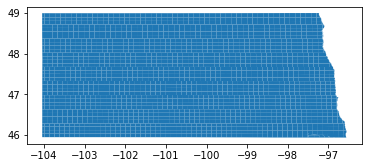

In [6]:
map_df.plot()

In [10]:
gdf = gpd.GeoDataFrame(DatabaseDF, geometry=gpd.points_from_xy(DatabaseDF.Longitude, DatabaseDF.Latitude))
# Take the data base and make a geopandas point with latitude and longitude

In [11]:
merged = gpd.sjoin(map_df, gdf, how="inner", op='intersects') # Merge new map of ND and the current database

/opt/anaconda3/envs/energyanalytics/lib/python3.6/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != None)
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [12]:
''' Maybe add a bit of explination as to how the merged DF was created,
perhaps you could add a quick test function just to make sure the townships are 
truly assigned to the proper wells'''
merged

,OBJECTID,TOWNSHIP,TDIR,RANGE,RDIR,TWPRNG,TWPTEXT,RNGTEXT,TWPRNGTEXT,AREA_MI2,...,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod,Completion Type,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
5,1135,148,N,94,W,148094,T148N,R94W,T148N R94W,35.290720,...,NaN,589.66871,92.97,Sleeves,18.0,NaN,NaN,NaN,NaN,2010.0
5,1135,148,N,94,W,148094,T148N,R94W,T148N R94W,35.290720,...,NaN,660.00000,51.41,Sleeves,10.0,NaN,NaN,NaN,NaN,2008.0
5,1135,148,N,94,W,148094,T148N,R94W,T148N R94W,35.290720,...,NaN,660.00000,71.33,P & P,NaN,6.0,NaN,NaN,NaN,2008.0
5,1135,148,N,94,W,148094,T148N,R94W,T148N R94W,35.290720,...,NaN,660.00000,37.93,P & P,NaN,12.0,NaN,NaN,NaN,2009.0
5,1135,148,N,94,W,148094,T148N,R94W,T148N R94W,35.290720,...,NaN,660.00000,76.78,Sleeves,12.0,NaN,NaN,NaN,NaN,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,854,143,N,103,W,143103,T143N,R103W,T143N R103W,35.417006,...,NaN,660.00000,88.16,Sleeves,40.0,NaN,NaN,NaN,NaN,2012.0
2061,854,143,N,103,W,143103,T143N,R103W,T143N R103W,35.417006,...,NaN,445.57061,105.46,Sleeves,30.0,NaN,NaN,NaN,NaN,2011.0
2061,854,143,N,103,W,143103,T143N,R103W,T143N R103W,35.417006,...,NaN,660.00000,94.74,Sleeves,16.0,NaN,NaN,NaN,NaN,2009.0
2061,854,143,N,103,W,143103,T143N,R103W,T143N R103W,35.417006,...,SLICKWATER (HC),660.00000,64.89,P & P,NaN,40.0,NaN,NaN,NaN,2014.0


In [41]:
''' These correlation tables (while interesting) feel out of place,
perhaps put these in a seperate notebook and reference them here with something like
"In the map/phyical notebook we realized there is a correlation between lat/long and y variable
so I will visualize that here ", instead of spitting out all this data '''

pearsoncorr = merged.corr(method = 'pearson')
pearsoncorr # Linear correlation
# can determine what values work best with Latitude and Longitude

,OBJECTID,TOWNSHIP,RANGE,TWPRNG,AREA_MI2,AREA_ACRES,SHAPE_AREA,SHAPE_LEN,index_right,Unnamed: 0,...,12 month Cum Prod,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled,Average with Sleeves and Prod,Frac and Prod Avg,RP and Prod Avg
OBJECTID,1.000000,0.846030,-0.061945,0.845992,-0.018042,-0.018042,0.085297,0.108791,0.502827,0.502827,...,-0.034367,0.079352,0.011073,0.002105,0.015775,0.063009,0.001471,-0.091549,-0.034326,-0.034236
TOWNSHIP,0.846030,1.000000,-0.011344,1.000000,-0.108267,-0.108267,0.012843,0.059461,0.243111,0.243111,...,-0.114921,0.061607,-0.008399,0.002916,0.013587,0.011609,-0.001576,-0.119526,-0.114864,-0.114815
RANGE,-0.061945,-0.011344,1.000000,-0.010624,-0.155010,-0.155010,-0.156377,-0.177808,0.011737,0.011737,...,-0.194472,0.112964,0.133063,0.034434,-0.004775,-0.185800,0.164685,-0.150737,-0.193783,-0.194530
TWPRNG,0.845992,1.000000,-0.010624,1.000000,-0.108380,-0.108380,0.012730,0.059333,0.243121,0.243121,...,-0.115062,0.061690,-0.008285,0.002940,0.013583,0.011497,-0.001457,-0.119635,-0.115005,-0.114956
AREA_MI2,-0.018042,-0.108267,-0.155010,-0.108380,1.000000,1.000000,0.992603,0.965884,0.057363,0.057363,...,0.067269,0.039221,0.043293,0.002880,0.001827,-0.122161,0.011930,0.047810,0.067329,0.067291
AREA_ACRES,-0.018042,-0.108267,-0.155010,-0.108380,1.000000,1.000000,0.992603,0.965884,0.057363,0.057363,...,0.067269,0.039221,0.043293,0.002880,0.001827,-0.122161,0.011930,0.047810,0.067329,0.067291
SHAPE_AREA,0.085297,0.012843,-0.156377,0.012730,0.992603,0.992603,1.000000,0.977101,0.087396,0.087396,...,0.053114,0.049035,0.041514,0.003242,0.003499,-0.185033,0.011152,0.033150,0.053180,0.053148
SHAPE_LEN,0.108791,0.059461,-0.177808,0.059333,0.965884,0.965884,0.977101,1.000000,0.068474,0.068474,...,0.051423,0.047013,0.044051,0.003394,0.003916,-0.163273,0.021584,0.030342,0.051493,0.051461
index_right,0.502827,0.243111,0.011737,0.243121,0.057363,0.057363,0.087396,0.068474,1.000000,1.000000,...,0.119804,0.186390,0.173148,0.000421,0.014141,0.191782,0.186718,0.015300,0.119816,0.119936
Unnamed: 0,0.502827,0.243111,0.011737,0.243121,0.057363,0.057363,0.087396,0.068474,1.000000,1.000000,...,0.119804,0.186390,0.173148,0.000421,0.014141,0.191782,0.186718,0.015300,0.119816,0.119936


In [42]:
spearmancorr = DatabaseDF.corr(method = 'spearman')
spearmancorr # Association with variables

,Unnamed: 0,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs","Fluid, bbls",Best1 Mo BOPD,Best3 Mo BOPD,...,Latitude,Longitude,SPACING_CAPPED,12 month Cum Prod,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
Unnamed: 0,1.000000,0.077660,0.232800,0.381223,0.006677,-0.049775,0.243052,0.198040,0.127087,0.129392,...,0.385105,-0.044463,-0.118379,0.145759,0.203367,0.178904,-0.575608,0.666886,0.176944,0.184971
Lateral Length,0.077660,1.000000,0.435665,0.018391,0.181624,-0.030477,0.326196,0.307917,0.141420,0.142319,...,0.021630,-0.185652,-0.184828,0.177257,0.405629,0.424934,0.028158,0.872082,0.480787,0.312223
Stages,0.232800,0.435665,1.000000,0.052379,0.162301,0.029076,0.658696,0.630845,0.251405,0.244439,...,0.050454,-0.171085,-0.291524,0.340166,0.908350,0.877969,0.301994,0.229416,1.000000,0.648229
Township,0.381223,0.018391,0.052379,1.000000,-0.018511,0.025329,0.010163,-0.021137,-0.174974,-0.165998,...,0.997491,-0.123387,0.036315,-0.165085,0.104709,0.022196,-0.688001,0.666886,-0.172964,-0.039493
Range,0.006677,0.181624,0.162301,-0.018511,1.000000,-0.020666,0.133176,0.274213,-0.121818,-0.144633,...,-0.014452,-0.983496,-0.020250,-0.157996,0.138849,0.162309,0.449071,0.648886,0.164849,0.167011
Section,-0.049775,-0.030477,0.029076,0.025329,-0.020666,1.000000,0.025029,0.021621,0.018478,0.016098,...,-0.036515,0.017142,-0.017271,0.010521,0.039962,0.009927,0.319731,-0.205196,0.008116,0.032135
"Total Prop, lbs",0.243052,0.326196,0.658696,0.010163,0.133176,0.025029,1.000000,0.856374,0.320731,0.331295,...,0.008453,-0.136473,-0.279404,0.440060,0.529296,0.615773,0.424671,0.564288,-0.151921,0.611360
"Fluid, bbls",0.198040,0.307917,0.630845,-0.021137,0.274213,0.021621,0.856374,1.000000,0.282209,0.291956,...,-0.022095,-0.272063,-0.289765,0.401960,0.507377,0.629173,0.680200,-0.205196,-0.066131,0.649717
Best1 Mo BOPD,0.127087,0.141420,0.251405,-0.174974,-0.121818,0.018478,0.320731,0.282209,1.000000,0.970644,...,-0.177390,0.139445,-0.220560,0.891192,0.184210,0.188430,0.204660,-0.820783,0.495085,0.206711
Best3 Mo BOPD,0.129392,0.142319,0.244439,-0.165998,-0.144633,0.016098,0.331295,0.291956,0.970644,1.000000,...,-0.168382,0.161616,-0.225671,0.937187,0.160880,0.202089,0.214894,-0.666886,0.443253,0.206136


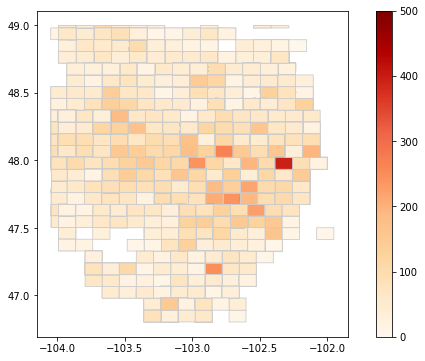

In [14]:
''' For all of the maps the code seems to be similar, I recommend writting a function to make it easier, like:

def coroMap(dataframe, variable, cmap = 'OrRd'):
    vmin = dataframe[variable].min()
    vmax = dataframe[variable].max()

    sm = plt.cm.Scalarmappable(cmap = cmap, norm = plt.Normalize(vmin=vmin, vmax=vmax))

    sm._A = []

    fig, ax = plt.subplots(1, figsize(15,10))

    cbar = fig.colorbar(sm)

    dataframe.plot(column=variable, cmap = cmap, linewidth = .8, ax = ax, edgecolor = '0.8')

Then you would only need to call

coroMap(merged, '12 month Cum Prod)

'''

# set the value column that will be visualised
variable = '12 month Cum Prod'
# set the range for the choropleth values
vmin, vmax = 0, 500
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure

fig, ax = plt.subplots(1, figsize=(10, 6))
cbar = fig.colorbar(sm)
merged.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

We are able to see where is the most 12 month cumulative production through North Dakota. This map uses Townships to be able to color code allow the spaces to exist. I wonder if we can use the map to find a correlation between, longitude, latitude, township, and the 12 month cumulative production.


We need to look at the corrlations of how longitude and latitude can impact the different features. Also, can we implement correlation onto the map

In [15]:
merged['Frac Ports'].unique()

array([nan, 19., 15., 20., 18., 37.,  1., 24.])

In [16]:
merged['Frac Ports'].max()

37.0

In [17]:
merged['Frac Ports'] = merged['Frac Ports'].fillna(0)

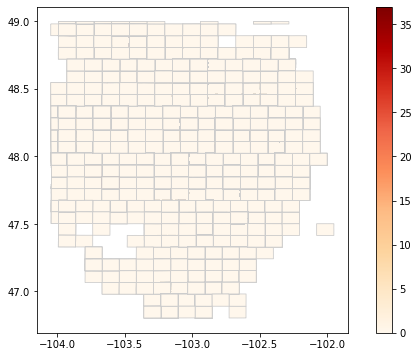

In [18]:
# set the value column that will be visualised
variable = 'Frac Ports'
# set the range for the choropleth values
vmin, vmax = 0, 37
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure

fig, ax = plt.subplots(1, figsize=(10, 6))
cbar = fig.colorbar(sm)
merged.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

Even though frac ports had a strong correlation to the longitude and latitude, we could see that it is not transparent through the townships.

In [19]:
merged['Repeater Ports'].unique()

array([nan, 15., 18., 16., 36.])

In [20]:
DatabaseDF['Repeater Ports'].max()

36.0

In [21]:
merged['Repeater Ports'] = merged['Repeater Ports'].fillna(0)

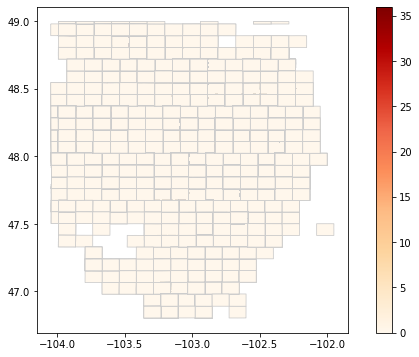

In [22]:
# set the value column that will be visualised
variable = 'Repeater Ports'
# set the range for the choropleth values
vmin, vmax = 0, 36
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure

fig, ax = plt.subplots(1, figsize=(10, 6))
cbar = fig.colorbar(sm)
merged.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

Seems like to make the map, these frac ports may not be the best way to visualize the relation between location. This may also make me think that correlation is not factored into the choropleth map as well. This requires more testing

## Messing with Different Features 

Although it is not obviously clear on how to connect correlation and error, I have decided to work with a couple of the features to understand and possibly compare side by side how the graphs look.

In [23]:
merged['Sleeves'].fillna(0)

5       18.0
5       10.0
5        0.0
5        0.0
5       12.0
        ... 
2061    40.0
2061    30.0
2061    16.0
2061     0.0
2061    22.0
Name: Sleeves, Length: 10856, dtype: float64

/opt/anaconda3/envs/energyanalytics/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


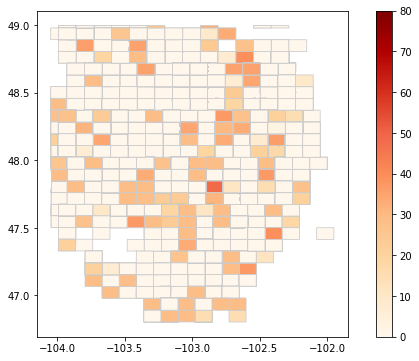

In [24]:
# set the value column that will be visualised
variable = 'Sleeves'
# set the range for the choropleth values
vmin, vmax = 0, 80
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure

fig, ax = plt.subplots(1, figsize=(10, 6))
cbar = fig.colorbar(sm)
merged.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

In [25]:
merged['Average with Sleeves and Prod'] = (merged['Sleeves'] + merged['12 month Cum Prod']) / 2

In [26]:
merged['Average with Sleeves and Prod'] = merged['Average with Sleeves and Prod'].fillna(0)

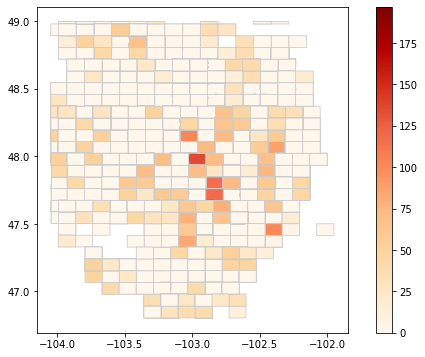

In [27]:
# set the value column that will be visualised
variable = 'Average with Sleeves and Prod'
# set the range for the choropleth values
vmin, vmax = 0, 197
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure

fig, ax = plt.subplots(1, figsize=(10, 6))
cbar = fig.colorbar(sm)
merged.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

Looking at the data, could we possibly take the average of some of the components to understand the relationship between the features? Requires more testing.

### Would this work with the Port features that failed to showcase in the beginning?

In [29]:
merged['Frac and Prod Avg'] = (merged['Frac Ports'] + merged['12 month Cum Prod']) / 2

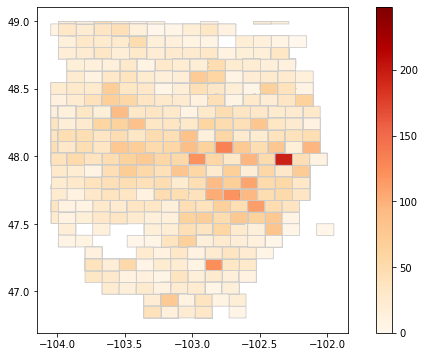

In [33]:
variable = 'Frac and Prod Avg'
# set the range for the choropleth values
vmin, vmax = 0, 248
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure

fig, ax = plt.subplots(1, figsize=(10, 6))
cbar = fig.colorbar(sm)
merged.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

Average may not be the best way, yet it does indicate some relationship between different variables

## Better ways to measure criteria?

After working on this model for some time, I am having trouble getting correlation visualized. I wonder if there is some code that can allow to see relationship between each point to be displayed on the map?

Using Average is beneficial yet can be difficult to tell the difference in terms of shading on the map

In [56]:
''' This seems like it belongs in another notebook and should be looked into further, very interesting '''

X = merged['Latitude']
Y = merged['Frac and Prod Avg']

In [57]:
# Errors of Avg Model
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
yfit = [a + b * xi for xi in X]

best fit line:
y = 407.04 + -7.45x


In [58]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, yfit)

14.174935287863734

In [59]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(X, yfit)

2.9080721178821887

In [60]:
X = merged['Longitude']
Y = merged['Frac and Prod Avg']

a, b = best_fit(X, Y)
yfit = [a + b * xi for xi in X]

best fit line:
y = 1343.32 + 12.57x


In [61]:
mean_squared_error(X, yfit)

23194.309889454762

In [62]:
mean_absolute_error(X, yfit)

152.20738079479034

Although I did not show all data, this model has one of the lowest errors I have seen in model test. This means this model really values the relationship of different features between latitude and longitude